# 0)Setup and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

df = pd.read_csv("./SeoulBikeData.csv", encoding="latin1")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),DayOfWeek,Month
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,3.002740,6.526027
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000,7.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,5.000000,10.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,6.000000,12.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.998056,3.448048


In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,DayOfWeek,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,4,12


The dataset contains hourly bike rental counts along with weather and calendar-related variables. Data types and summary statistics provide an initial check of variable ranges and potential anomalies (e.g., zero-inflated precipitation variables). Converting Date to a proper datetime format enables time-based aggregations and pattern analysis.

# 1)Time-Based Visualizations

## 1.1) Time series - rentals over time (daily)

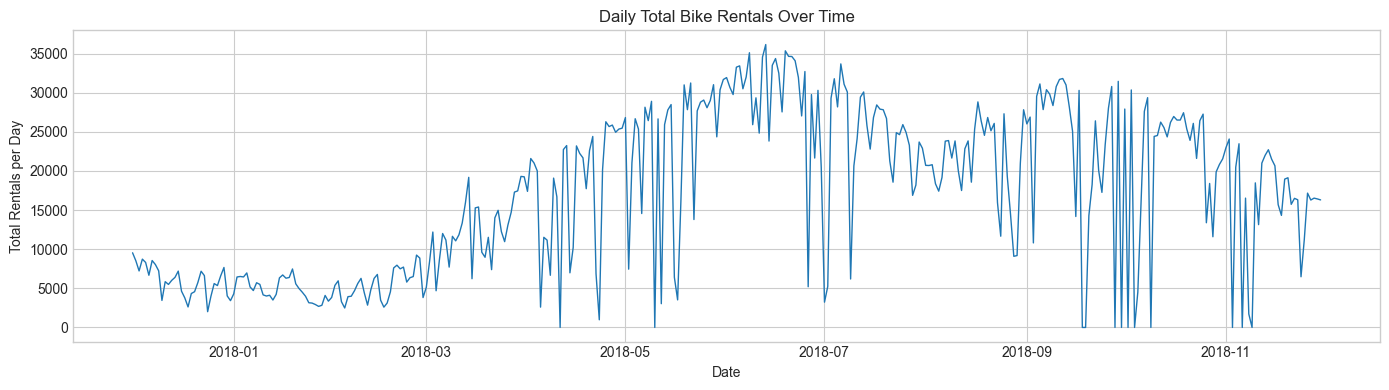

In [3]:
daily = df.groupby("Date")["Rented Bike Count"].sum().reset_index()

plt.figure(figsize=(14,4))
plt.plot(daily["Date"], daily["Rented Bike Count"], linewidth=1)
plt.title("Daily Total Bike Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals per Day")
plt.tight_layout()
plt.show()


Daily rentals exhibit a strong seasonal cycle, with demand increasing from colder months toward summer and declining again into winter. The series also shows substantial day-to-day variability, likely driven by short-term weather changes (rain, temperature shifts), day-of-week effects, and holidays. This suggests that models should capture both long-term seasonality and short-term fluctuations.

## 1.2) Hourly pattern - average rentals by hour

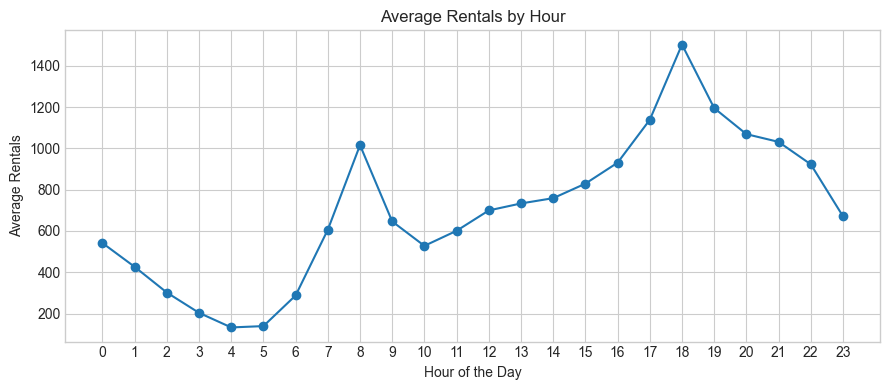

In [4]:
hourly = df.groupby("Hour")["Rented Bike Count"].mean()

plt.figure(figsize=(9,4))
hourly.plot(marker="o")
plt.xticks(range(0,24))
plt.title("Average Rentals by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.grid(True)
plt.tight_layout()
plt.show()


The hourly profile shows a clear commuting signature with two pronounced peaks—typically around morning (≈8 AM) and evening (≈6 PM) rush hours—indicating that a large portion of rentals is linked to work/school travel. Night-time demand is consistently low, reflecting reduced mobility and station availability patterns.

## 1.3) Daily pattern - day of week

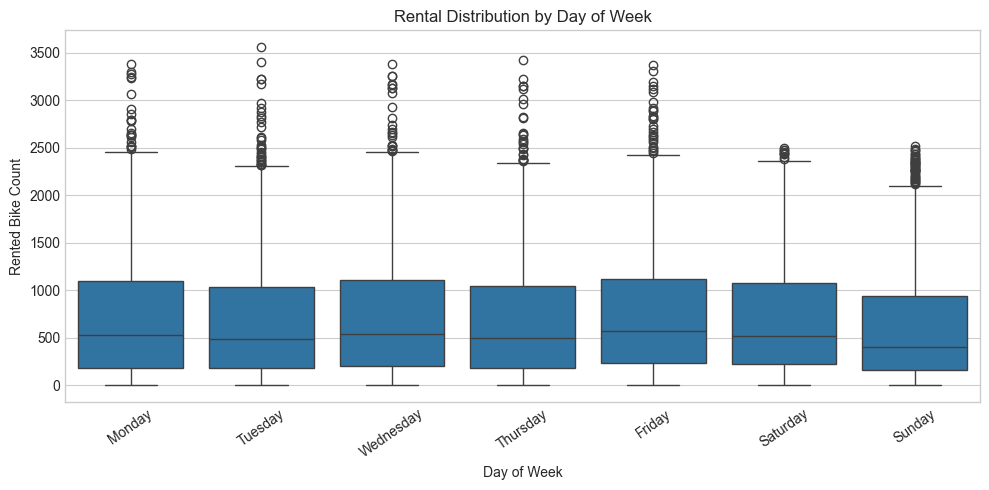

In [5]:
df["DayOfWeek"] = df["Date"].dt.day_name()

order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="DayOfWeek", y="Rented Bike Count", order=order)
plt.title("Rental Distribution by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Rented Bike Count")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


Weekdays generally show higher median rentals and a wider spread, consistent with commuting demand and pronounced peaks at specific hours. Weekends tend to have lower typical demand and slightly reduced variability, reflecting a shift toward leisure-oriented usage rather than routine commuting. Sundays typically appear as the lowest-demand day, indicating reduced travel activity. The presence of high outliers—especially on weekdays—suggests occasional high-demand situations (e.g., exceptionally good weather, events, or seasonal spikes).

## 1.4) Seasonal pattern - rentals by season

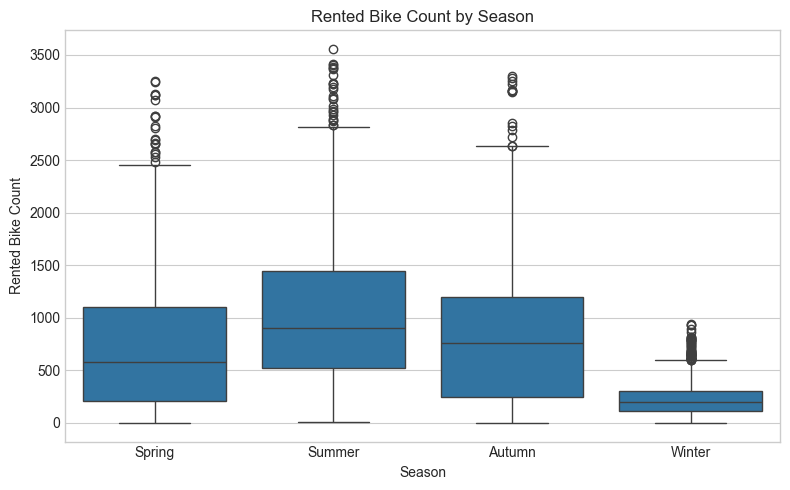

In [6]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Seasons",
    y="Rented Bike Count",
    order=["Spring","Summer","Autumn","Winter"]
)
plt.title("Rented Bike Count by Season")
plt.xlabel("Season")
plt.ylabel("Rented Bike Count")
plt.tight_layout()
plt.show()


Bike demand varies strongly across seasons. Summer shows the highest typical rentals (higher median and upper quartile), while winter shows the lowest demand, reflecting the impact of temperature, daylight, and overall comfort of cycling conditions. Spring and autumn lie between these extremes and often show broader overlaps depending on weather variability. The larger number of high-demand outliers in warmer seasons suggests that favorable conditions can trigger occasional demand surges beyond the typical range.

# 2) Distribution Visualizations

## 2.1) Histograms - numerical variables

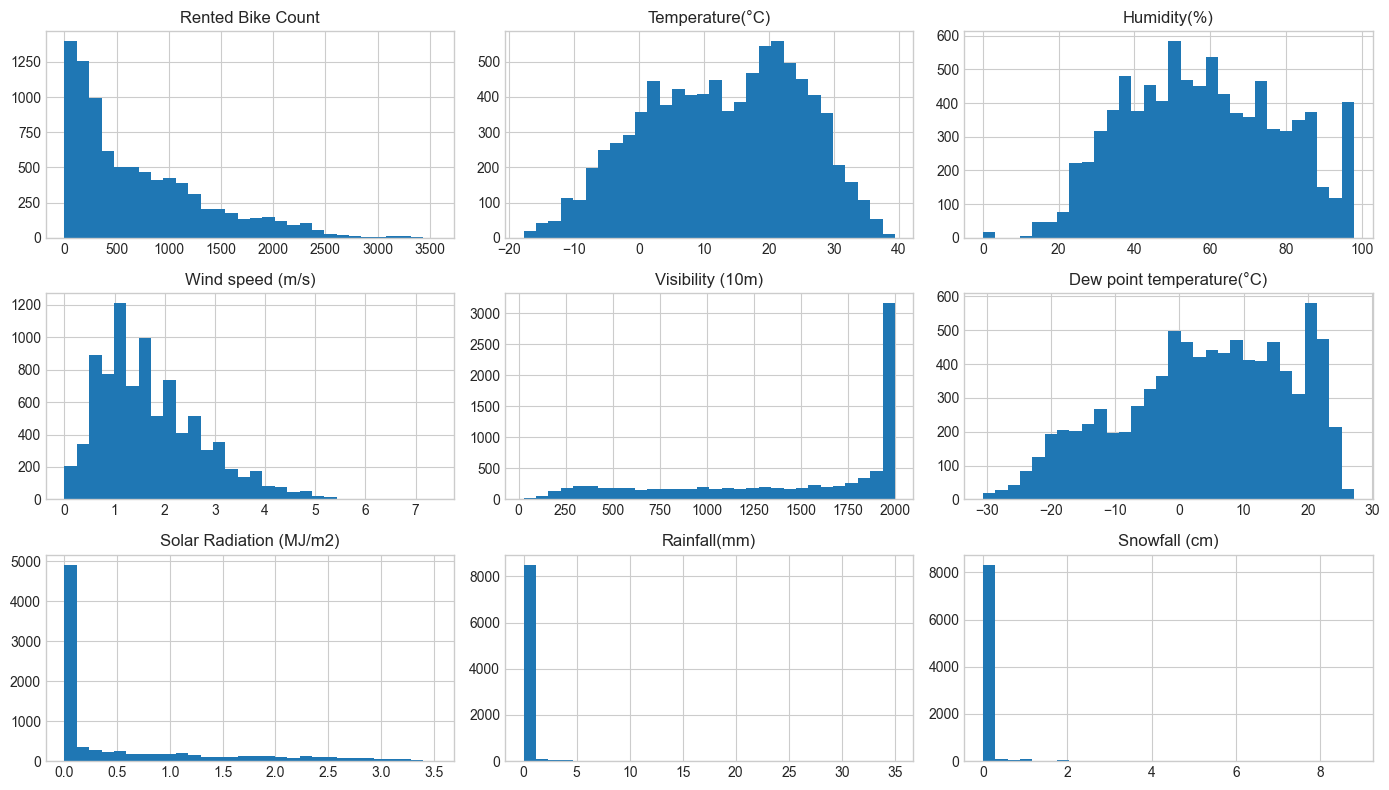

In [7]:
num_cols = [
    "Rented Bike Count",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)"
]

df[num_cols].hist(bins=30, figsize=(14,8))
plt.tight_layout()
plt.show()


The target variable (rented bike count) is strongly right-skewed: most hours have relatively low to moderate demand, while very high-demand hours occur less frequently. Several weather variables (especially rainfall and snowfall) are zero-inflated, meaning the majority of observations are zero with a small number of non-zero events—this is typical for precipitation data. Temperature and humidity show broader distributions consistent with seasonal variation, while wind speed tends to cluster at low values with a long right tail.

## 2.2) Boxplots - weather variables

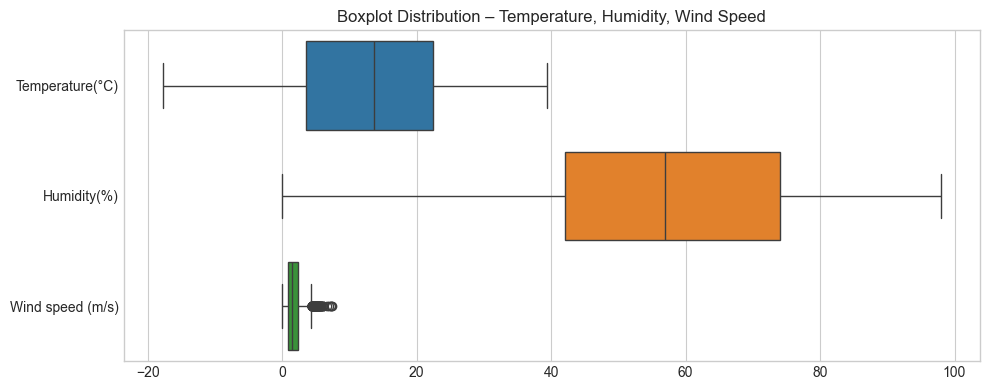

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df[[
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)"
]], orient="h")
plt.title("Boxplot Distribution – Temperature, Humidity, Wind Speed")
plt.tight_layout()
plt.show()


Due to large differences in variable scales, weather boxplots are shown in separate groups. Temperature and humidity exhibit wide variability, while wind speed remains concentrated at low values. Rainfall and snowfall are highly zero-inflated with occasional extreme events, visible as outliers (shown in the below picture).

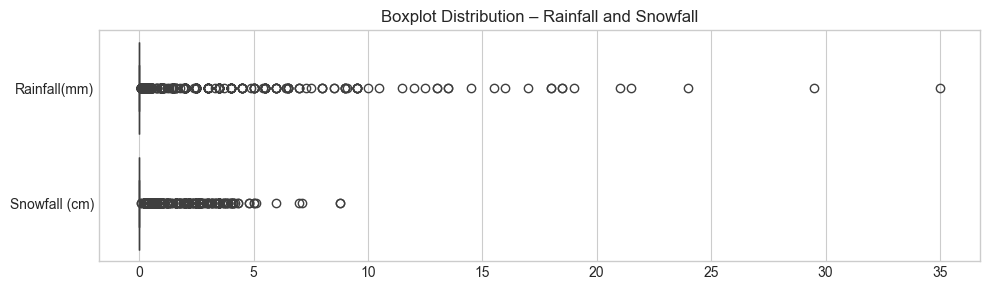

In [10]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df[[
    "Rainfall(mm)",
    "Snowfall (cm)"
]], orient="h")
plt.title("Boxplot Distribution – Rainfall and Snowfall")
plt.tight_layout()
plt.show()


# 3) Correlation Analysis

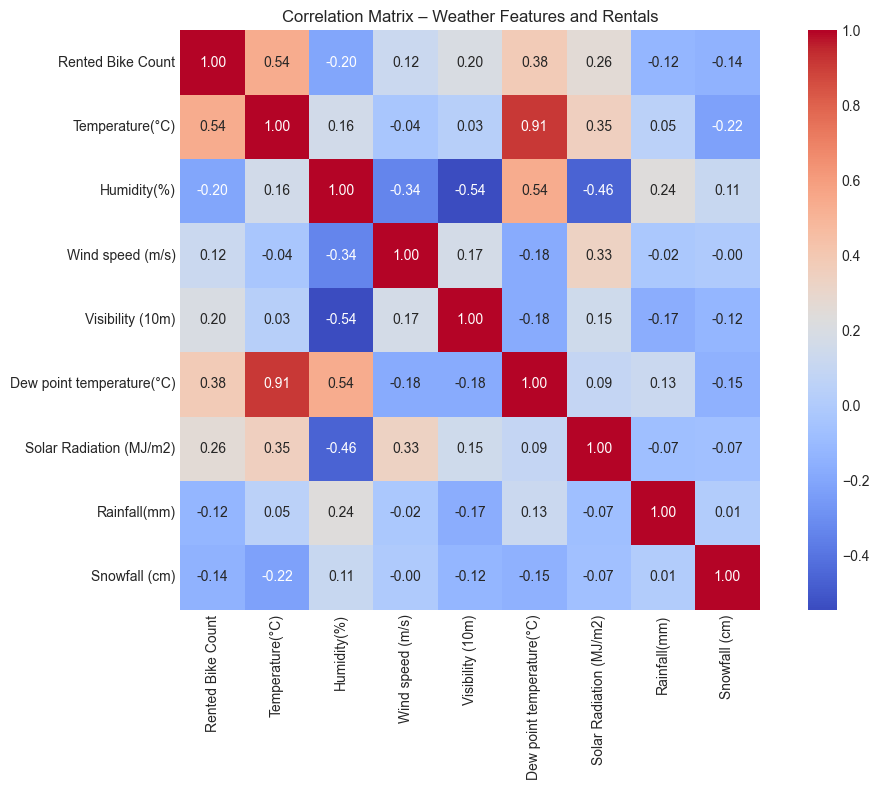

In [11]:
plt.figure(figsize=(11,8))
corr = df[num_cols].corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", square=True, fmt=".2f")
plt.title("Correlation Matrix – Weather Features and Rentals")
plt.tight_layout()
plt.show()



Temperature typically shows the strongest positive association with bike rentals (0.54), indicating higher demand in warmer conditions. Dew point temperature is also positively correlated with rentals, but it is very strongly correlated with temperature itself, suggesting partial redundancy (multicollinearity) between these variables. Rainfall and snowfall tend to show negative correlations with rentals, consistent with reduced cycling activity during precipitation. Other variables (e.g., wind speed, humidity, solar radiation) may show weaker or moderate correlations, implying that their effects could be non-linear or context-dependent and may be better captured by flexible models rather than linear assumptions.

# 4) Statistical Summaries

## 4.1) Average rentals by hour

In [12]:
df.groupby("Hour")["Rented Bike Count"].mean()


Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

The hourly averages quantify the strong intra-day variation and confirm the rush-hour structure observed in the hourly line plot.

## 4.2) Average rentals by day of week


In [13]:
df.groupby("DayOfWeek")["Rented Bike Count"].mean()


DayOfWeek
Friday       747.117925
Monday       730.563301
Saturday     709.528846
Sunday       625.155449
Thursday     690.704327
Tuesday      687.977564
Wednesday    740.349359
Name: Rented Bike Count, dtype: float64

Day-of-week averages provide a compact summary of weekly demand differences. Even if differences in mean appear moderate, they can still be meaningful for operational planning and can interact with hour-of-day patterns (e.g., weekday commuter peaks vs weekend leisure patterns).

## 4.3) Average rentals by season

In [14]:
df.groupby("Seasons")["Rented Bike Count"].mean()


Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64

Seasonal averages quantify the magnitude of demand changes across seasons and confirm that seasonality is a major driver of bike usage, with summer having significantly higher mean.

## 4.4) Weather statistics

In [16]:
weather_cols = [
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Rainfall(mm)",
    "Snowfall (cm)"
]

df[weather_cols].describe()



,Temperature(°C),Humidity(%),Wind speed (m/s),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.882922,58.226256,1.724909,0.148687,0.075068
std,11.944825,20.362413,1.036300,1.128193,0.436746
min,-17.800000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,42.000000,0.900000,0.000000,0.000000
50%,13.700000,57.000000,1.500000,0.000000,0.000000
75%,22.500000,74.000000,2.300000,0.000000,0.000000
max,39.400000,98.000000,7.400000,35.000000,8.800000


The descriptive statistics confirm the distributional patterns: temperature and humidity span broad ranges, wind speed is generally low, and precipitation variables have very low medians but occasionally high maxima. If humidity contains rare 0% values, these are likely measurement artifacts and can be flagged as anomalies; given their low frequency, they typically do not materially affect overall patterns but are worth noting as a data quality detail.